In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_rich_income_10K'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = '7b6c6e54-9a73-40c5-97ce-1d36d8734d26'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(76, 33)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:39:22.050,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.796561,1.000000,0.000000,0.794867,1.000000,0.000000,0.801218,1.000000,0.000000,0.798100
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:40:51.154,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.798985,1.000000,0.000000,0.800163,1.000000,0.000000,0.801414,1.000000,0.000000,0.800800
2,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:39:22.055,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.745122,1.000000,0.000000,0.753436,1.000000,0.000000,0.748098,1.000000,0.000000,0.750700
3,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:40:51.159,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.759445,1.000000,0.000000,0.772103,1.000000,0.000000,0.754537,1.000000,0.000000,0.763100
4,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:39:22.050,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.645712,0.597200,0.835661,0.648988,0.602174,0.830384,0.636933,0.588802,0.830932,0.642851
5,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:40:51.154,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.657898,0.610856,0.844878,0.662550,0.618480,0.839009,0.648179,0.600787,0.839437,0.655234
6,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:39:22.055,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.689752,0.638983,0.838171,0.681785,0.634378,0.826647,0.692079,0.640042,0.846617,0.687060
7,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:40:51.159,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.701046,0.651807,0.856493,0.692545,0.645871,0.850675,0.705368,0.655005,0.860178,0.699117
8,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:39:22.050,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.796772,1.000000,0.000000,0.763003,1.000000,0.000000,0.813765,1.000000,0.000000,0.791490
9,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:40:51.154,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.800000,1.000000,0.000000,0.771595,1.000000,0.000000,0.813915,1.000000,0.000000,0.795230


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [11]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:40:51.154,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.798985,1.000000,0.000000,0.800163,1.000000,0.000000,0.801414,1.000000,0.000000,0.800800
5,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:40:51.154,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.657898,0.610856,0.844878,0.662550,0.618480,0.839009,0.648179,0.600787,0.839437,0.655234
9,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:40:51.154,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.800000,1.000000,0.000000,0.771595,1.000000,0.000000,0.813915,1.000000,0.000000,0.795230
13,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:40:51.154,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.193519,0.000000,1.000000,0.198355,0.000000,1.000000,0.190110,0.000000,1.000000,0.193663
17,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:40:51.154,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.208468,0.000000,1.000000,0.200915,0.000000,1.000000,0.208386,0.000000,1.000000,0.204305
21,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:40:51.154,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.072667,0.067272,0.094111,0.072206,0.067246,0.092065,0.072064,0.066529,0.094400,0.072133
25,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:40:51.154,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.105793,0.076285,0.223077,0.102383,0.074440,0.214271,0.103241,0.074461,0.219387,0.102820
29,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:40:51.154,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.875467,0.910976,0.734328,0.880220,0.914053,0.744750,0.877745,0.912353,0.738081,0.878960
33,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:40:51.154,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.501525,0.506615,0.481293,0.537895,0.556143,0.464831,0.484753,0.483701,0.488998,0.510841
37,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-21 14:40:51.154,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.679374,0.631074,0.871356,0.683491,0.638300,0.864441,0.669573,0.620873,0.866109,0.676406


In [12]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][1].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
3,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:40:51.159,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.759445,1.000000,0.000000,0.772103,1.000000,0.000000,0.754537,1.000000,0.000000,0.763100
7,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:40:51.159,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.701046,0.651807,0.856493,0.692545,0.645871,0.850675,0.705368,0.655005,0.860178,0.699117
11,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:40:51.159,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.656356,1.000000,0.000000,0.576762,1.000000,0.000000,0.689995,1.000000,0.000000,0.645518
15,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:40:51.159,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.281228,0.000000,1.000000,0.269305,0.000000,1.000000,0.287169,0.000000,1.000000,0.281000
19,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:40:51.159,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.221449,0.000000,1.000000,0.216723,0.000000,1.000000,0.219551,0.000000,1.000000,0.218000
23,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:40:51.159,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.072459,0.066872,0.090097,0.071050,0.065850,0.088666,0.073336,0.067612,0.090929,0.072221
27,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:40:51.159,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.113274,0.083932,0.205907,0.103508,0.075824,0.197300,0.119571,0.088958,0.213672,0.111740
31,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:40:51.159,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.866877,0.902228,0.755274,0.878974,0.912327,0.765977,0.858888,0.895837,0.745310,0.868680
35,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:40:51.159,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.582814,0.624014,0.452743,0.614141,0.674636,0.409187,0.566337,0.594196,0.480698,0.589641
39,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-21 14:40:51.159,7b6c6e54-9a73-40c5-97ce-1d36d8734d26,Exp_iter_1,...,0.720339,0.670005,0.879246,0.711072,0.663418,0.872520,0.725057,0.673569,0.883329,0.718239


In [13]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [14]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.008245,-0.013076,-0.001450,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.007471,-0.031144,-0.025270,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.008245,0.013076,0.001450,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.088658,1.084846,1.116087,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.087781,0.085715,0.117968,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,-0.001251,0.011244,0.013609,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,1.002820,1.023716,1.029906,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,0.000142,-0.005453,-0.004000,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,0.000149,-0.005181,-0.004747,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,1.002202,0.924811,0.930384,RandomForestClassifier,Exp_iter_1,0.7,0


In [15]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.008245,-0.013076,-0.001450,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.007471,-0.031144,-0.025270,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.008245,0.013076,0.001450,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.088658,1.084846,1.116087,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.087781,0.085715,0.117968,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [16]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [17]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

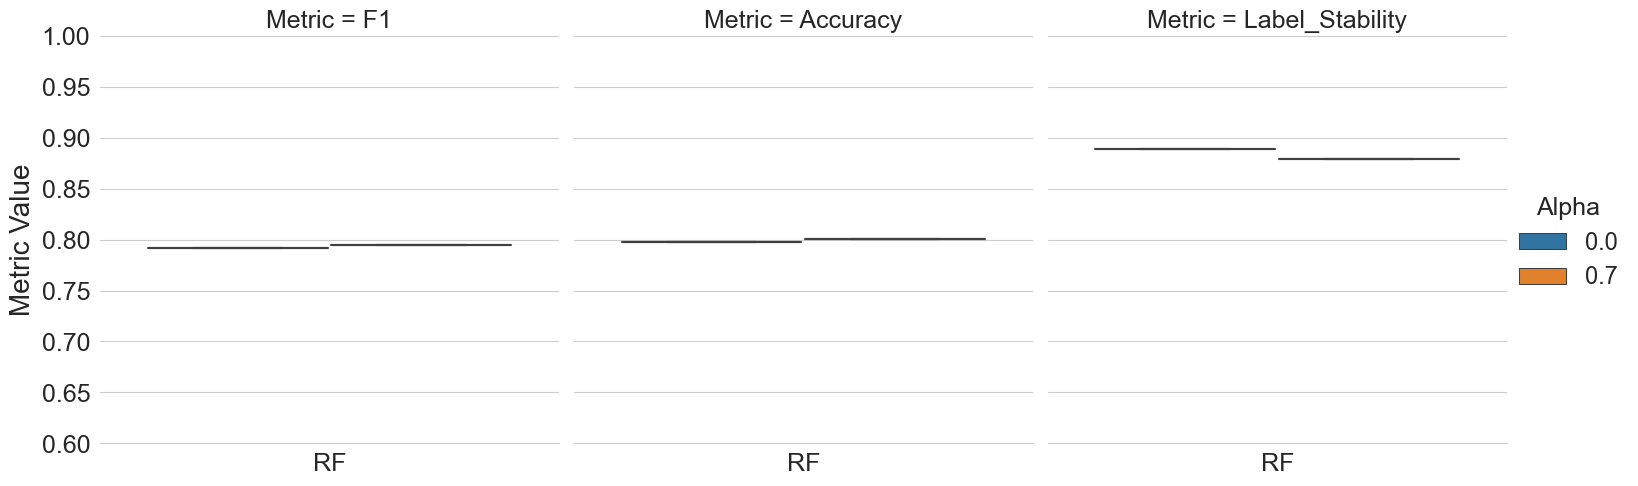

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

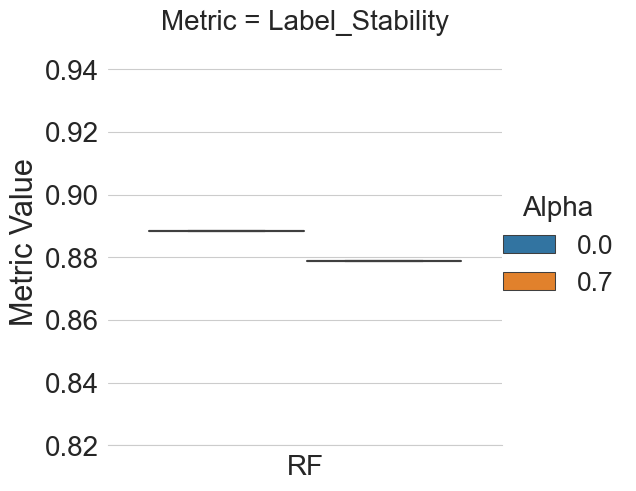

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

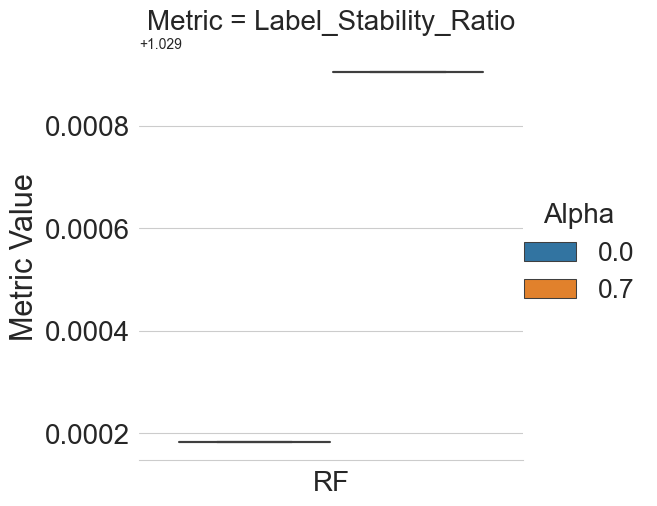

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

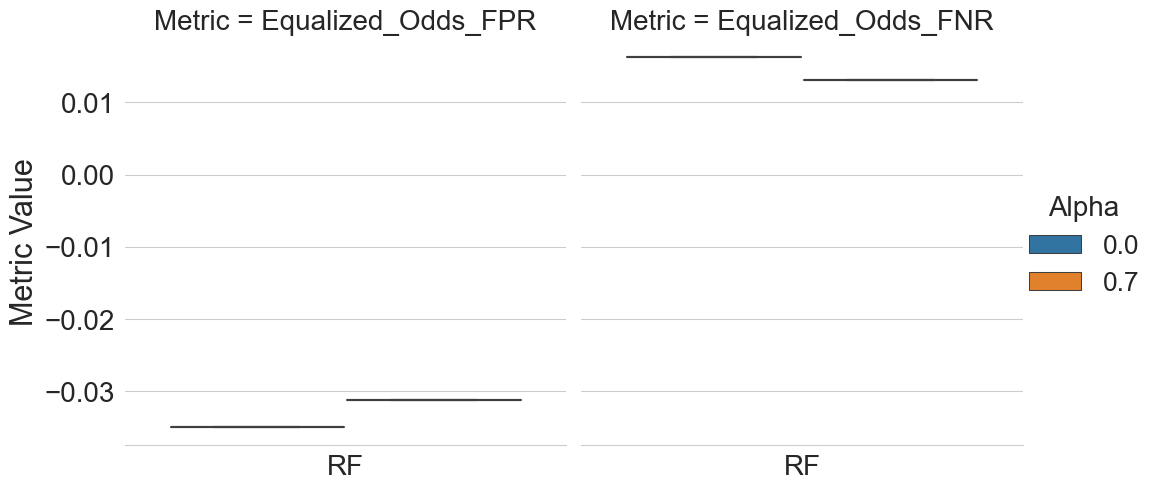

In [21]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [22]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Rich set',
    1: 'Poor set',
}

<Figure size 1200x600 with 0 Axes>

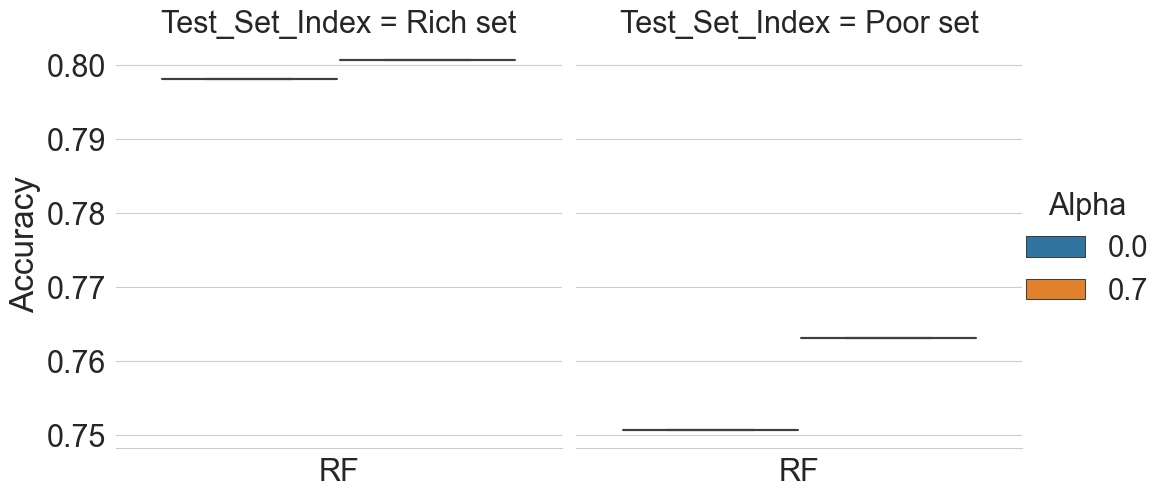

In [23]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

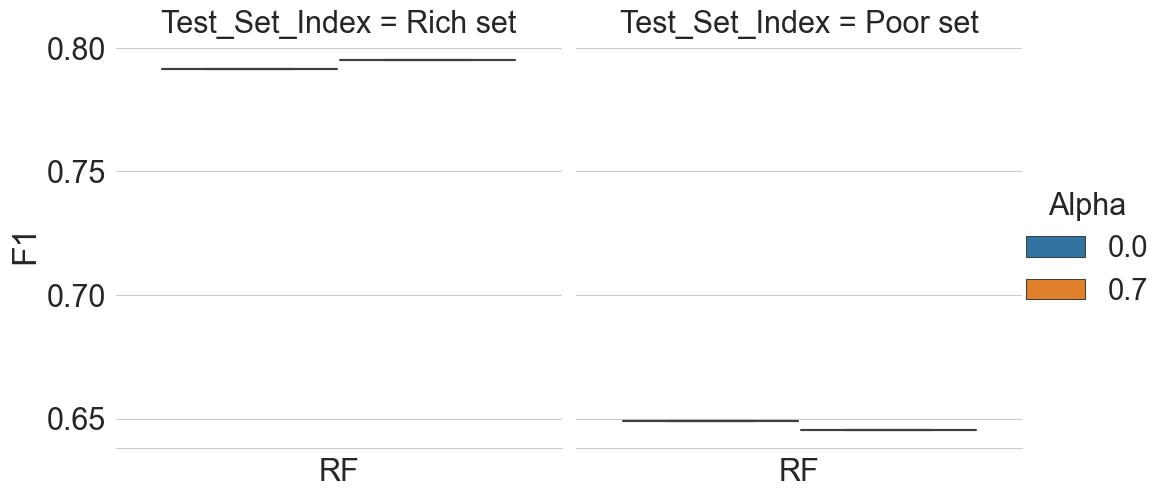

In [24]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

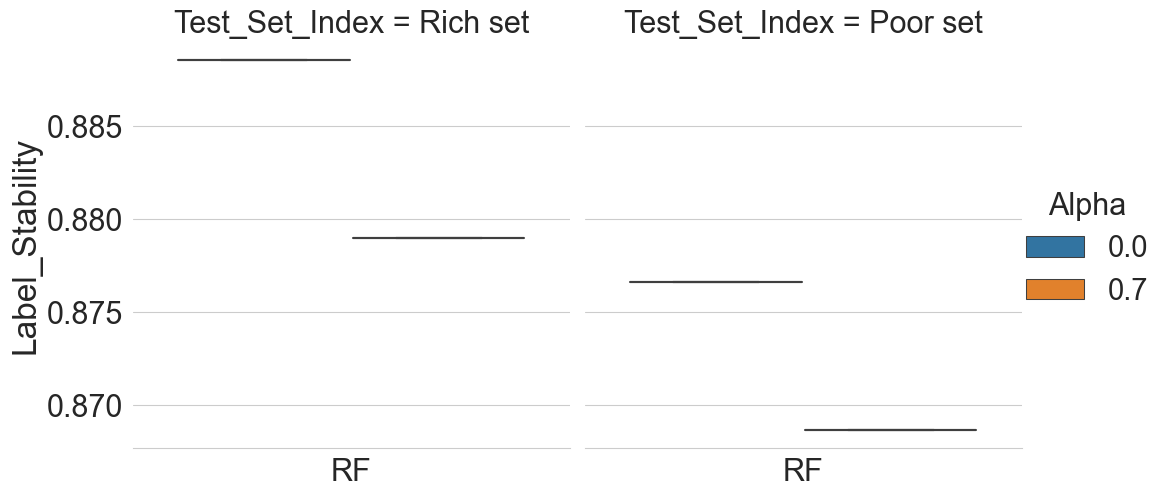

In [25]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

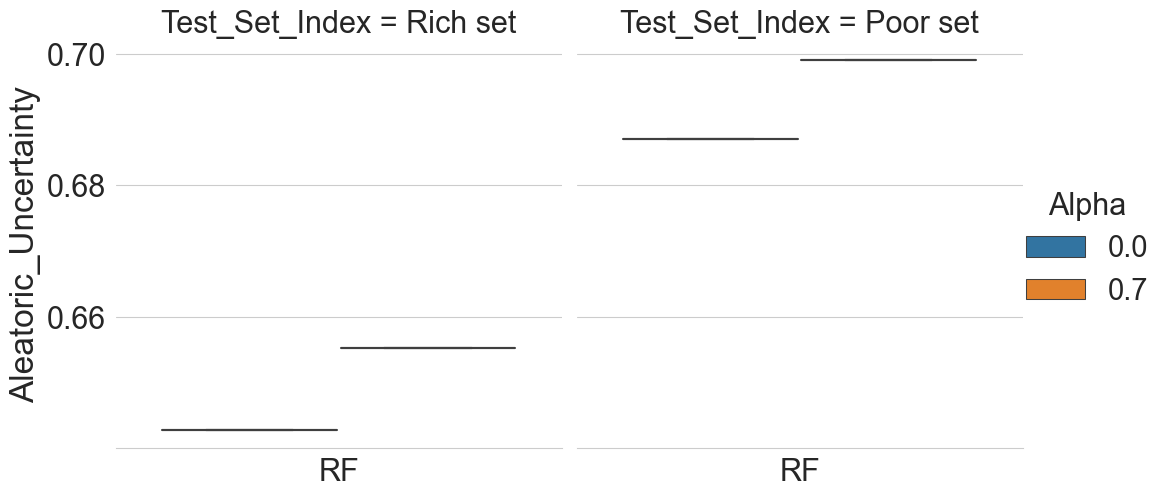

In [26]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

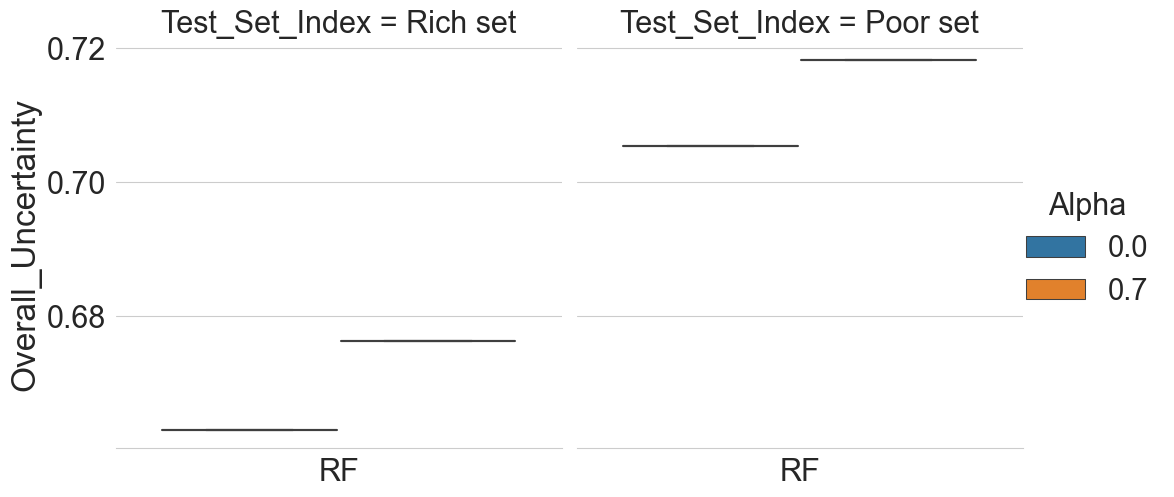

In [27]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

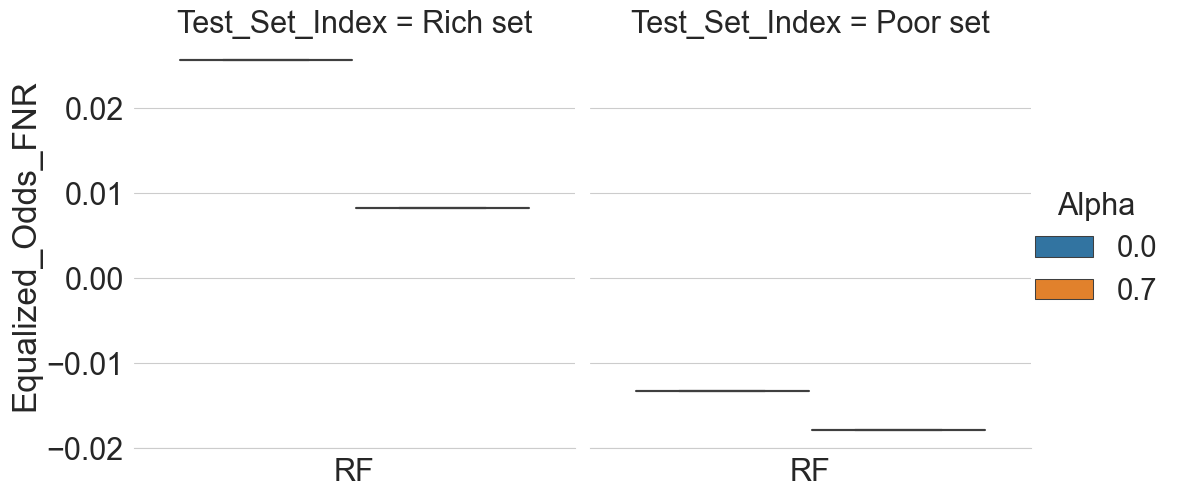

In [28]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

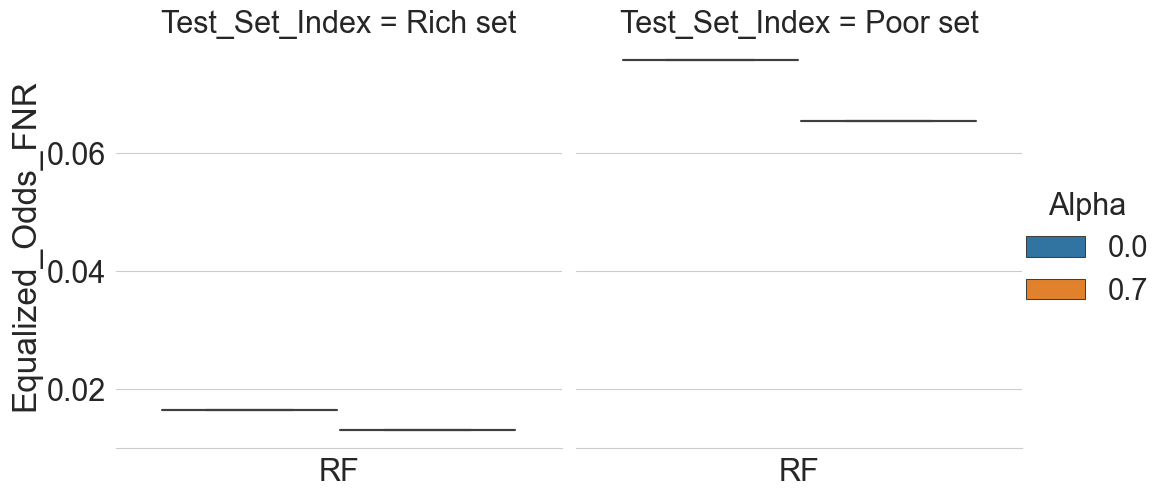

In [29]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

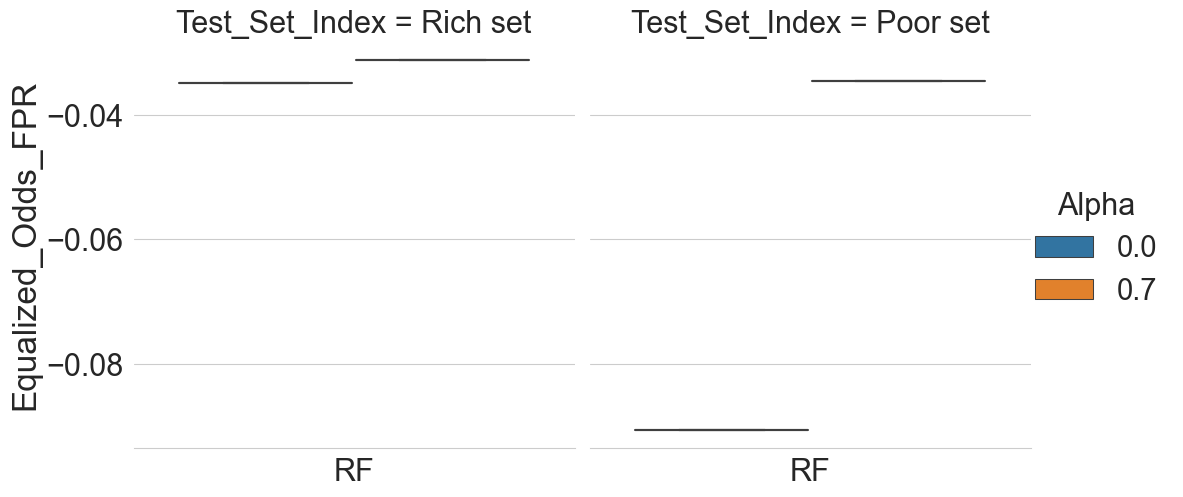

In [30]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)